# Aula de Regressão Logística
## Importação das bibliotecas e inicialização do dataframe

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cat_breeds.csv", sep=";")
df

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3,female,False,19,2.0,white,solid,blue,False,wet,46,16,France,43.296482,5.369780
1,Angora,0.33,4,male,False,19,2.5,white,solid,blue,False,wet,48,16,France,43.611660,3.877710
2,Angora,0.50,6,male,False,20,2.8,black,solid,green,False,wet,41,11,France,44.837789,-0.579180
3,Angora,0.50,6,female,False,21,3.0,white,solid,blue,False,wet,24,8,France,43.611660,3.877710
4,Angora,0.50,6,male,False,21,3.0,red/cream,tabby,green,False,wet,51,10,France,48.864716,2.349014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,Maine coon,0.17,2,female,False,15,1.2,white,solid,blue,False,wet,35,20,UK,51.507351,-0.127758
1067,Maine coon,0.17,2,female,False,17,1.0,black,bicolor,blue,False,wet,36,19,UK,51.507351,-0.127758
1068,Maine coon,0.17,2,male,False,14,0.7,red/cream,tabby,blue,False,wet,20,20,UK,51.507351,-0.127758
1069,Maine coon,0.17,2,male,False,16,1.1,red/cream,tabby,green,False,wet,34,19,UK,52.486244,-1.890401


## Procurando por valores nulos

In [12]:
df.isnull().sum()

Breed                      0
Age_in_years               0
Age_in_months              0
Gender                     0
Neutered_or_spayed         0
Body_length                0
Weight                     0
Fur_colour_dominant        0
Fur_pattern                0
Eye_colour                 0
Allowed_outdoor            0
Preferred_food             0
Owner_play_time_minutes    0
Sleep_time_hours           0
Country                    0
Latitude                   0
Longitude                  0
dtype: int64

## Limpando as colunas do dataframe

In [13]:
features = [
    'Body_length', 'Weight', 'Fur_colour_dominant', 'Fur_pattern', 'Eye_colour', 'Country', 'Latitude', 'Longitude'
]
target = 'Breed'

clean_base = df[features]
clean_target = df[target].copy()

## Utilizando LabelEncoder para transformar colunas não numéricas

In [14]:
from sklearn.preprocessing import LabelEncoder

features_les = {}
base_encoded = clean_base.copy()
for feat in features:
    if base_encoded[feat].dtype == 'object':
        features_les[feat] = LabelEncoder()
        base_encoded[feat] = features_les[feat].fit_transform(base_encoded[feat])

target_le = LabelEncoder()
target_encoded = clean_target.copy()
if(clean_target.dtype == 'object'):
    target_encoded = target_le.fit_transform(target_encoded)
target_encoded = pd.Series(target_encoded, name=target)

## Usando StandardScaler para deixar os dados na mesma escala (média e desvio padrão)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
base_scaled = scaler.fit_transform(base_encoded)

## Selecionando dados para teste e treino com Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

x = base_scaled.copy()
y = target_encoded.copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

# Utilizando diferentes algoritmos de classificação
## Regressão Logística

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression(random_state=1, max_iter=100)
logistic_r.fit(x_train, y_train)

model = logistic_r

## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(base_encoded, target_encoded, test_size = 0.2, random_state = 11)

g_naivebayes = GaussianNB()
g_naivebayes.fit(x_train, y_train)

model = g_naivebayes

## Decision Tree Classifier

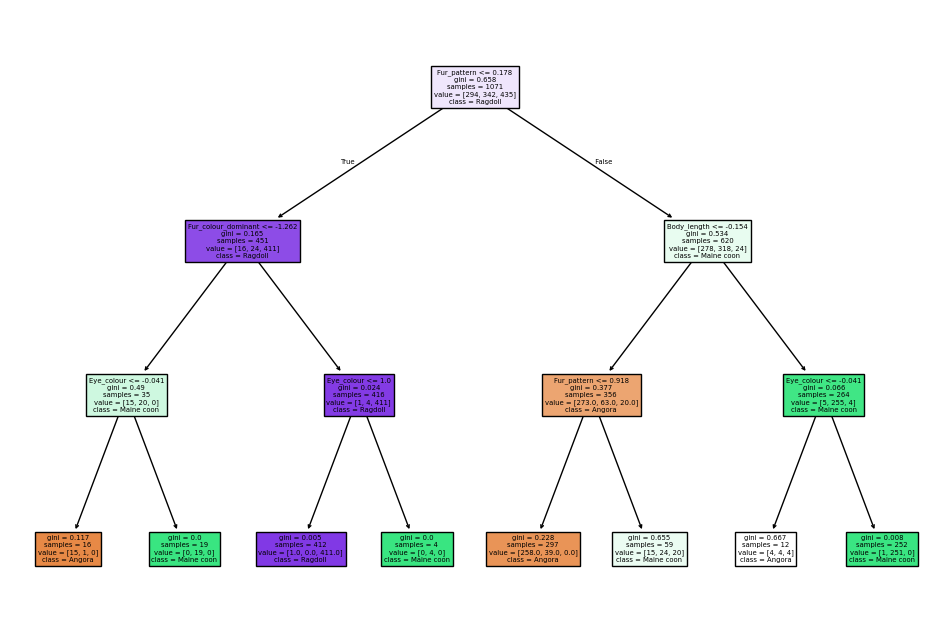

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(x, y)

model = tree


plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=features, class_names=clean_target.unique(), filled=True)
plt.show()

# Métricas de qualidade
## Acurácia

In [20]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
accuracy

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.3627906976744186

## Precisão

In [21]:
from sklearn.metrics import precision_score

pred = model.predict(x_test)
precision = precision_score(y_test, pred, average='macro')
precision

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.12093023255813955

## Recall

In [22]:
from sklearn.metrics import recall_score

pred = model.predict(x_test)
recall = recall_score(y_test, pred, average='macro')
recall

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.3333333333333333

## F1_SCORE

In [23]:
from sklearn.metrics import f1_score

pred = model.predict(x_test)
f1 = f1_score(y_test, pred, average='macro')
f1

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.17747440273037543

## Matriz de Confusão

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.3627906976744186

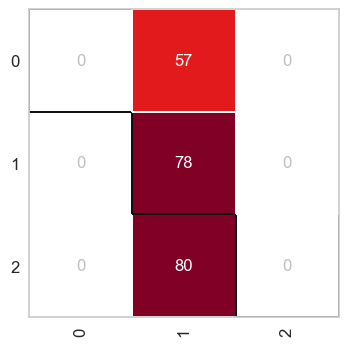

In [24]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(4,4))

pred = model.predict(x_test)
cm = ConfusionMatrix(model)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

## Classification Report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.36      1.00      0.53        78
           2       0.00      0.00      0.00        80

    accuracy                           0.36       215
   macro avg       0.12      0.33      0.18       215
weighted avg       0.13      0.36      0.19       215



c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,